# 機器學習專案三

## 資料說明及前處理

1.資料來源：TEJ資料庫

2.資料範圍：2008年-2020年本國銀行各項財務指標之各月總平均

3.採用指標：<br/>
(1)權益比率 Equity：表示銀行長期生存能力，低於5%代表有問題，越高越好<br/>
(2)資產報酬率 ROA：表示銀行獲利能力，越高越好<br/>
(3)存放比 LtoD：表示銀行流動性風險，正常值應小於100%，數值越高風險越高<br/>
(4)逾放比 NPL：表示銀行放款品質，3%以下表示授信品質好，數值越高放款品質越差<br/>
(5)備抵呆帳覆蓋率 Coverage：表示銀行承受呆帳能力，越高越好<br/>
(6)利息總收益比 NIM：表示銀行獲利能力，越高越好<br/>
(7)風險性 Risk：表示銀行承受風險的能力，越高越好<br/>

4.前處理：<br/>
(1)些許銀行資料量過少，因此決定以2020仍在營業的銀行作為觀察對象，捨棄大眾銀行、中華銀行、慶豐銀行、寶華銀行、澳盛台灣、樂天銀行。<br/>
(2)空值代表該銀行沒有提供該項服務，以0補值<br/>


## 共現性分析

(1)計算出各項指標之四分位數後，以四分位距作為分組依據<br/>
(2)橫軸欄位名稱以銀行代號命名，縱軸是四分位距，銀行的值落在該區間則標示1，其餘標示0

In [73]:
import pandas as pd
import numpy as np
import time
import requests
from tqdm import tqdm_notebook
import json
import statistics as stat
import multiprocessing as mp

In [74]:
# 讀取分組後資料
data = pd.read_csv('Bank_itemset_1.csv',na_values=['#VALUE!', '#DIV/0!'])
data.fillna(value=0, inplace=True)
data

,Bank,7,147,11,5,822,EROCTWTP,806,815,48,...,8,108,81,103,101,9,50,4,805,803
0,EquityQ1,0,1,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,EquityQ2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,EquityQ3,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,1,0,0,0,0
3,EquityQ4,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,ROAQ1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
5,ROAQ2,0,1,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
6,ROAQ3,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
7,ROAQ4,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,LtoDQ1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9,LtoDQ2,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [75]:
# 捨去不必要欄位
data = data.drop(['Bank'], axis=1)
data

,7,147,11,5,822,EROCTWTP,806,815,48,53,...,8,108,81,103,101,9,50,4,805,803
0,0,1,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
3,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
5,0,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## make co-occurrence matrix

In [76]:
col = list(data.columns)
co_matrix_df = pd.DataFrame(columns=col)
co_matrix_weight = []
for index in tqdm_notebook(col):
    line_list = []
    for df_label in col:
        if index == df_label:
            line_list.append(0)
#             co_matrix_weight.append([index, df_label, 0])
        else:
            df1 = data[data[index] == 1]
            df1 = df1[df1[df_label] == 1]
            line_list.append(len(df1))
#             co_matrix_weight.append([index, df_label, len(df1)])
            if len(df1) >= 0:
                co_matrix_weight.append([index, df_label, len(df1)])
        
    co_matrix_df.loc[index] = line_list

ipykernel_launcher:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/36 [00:00<?, ?it/s]

In [77]:
co_matrix_df

,7,147,11,5,822,EROCTWTP,806,815,48,53,...,8,108,81,103,101,9,50,4,805,803
7,0,0,1,2,1,0,2,1,4,3,...,2,2,0,4,0,6,1,3,4,1
147,0,0,1,4,1,1,2,2,0,1,...,4,4,0,2,1,0,3,1,0,2
11,1,1,0,1,5,1,3,1,3,1,...,1,1,3,0,1,1,0,1,2,0
5,2,4,1,0,1,2,2,0,1,1,...,4,2,1,2,2,2,2,0,0,2
822,1,1,5,1,0,3,3,0,2,1,...,1,0,3,0,1,1,0,2,0,2
EROCTWTP,0,1,1,2,3,0,1,1,1,1,...,1,1,2,0,2,0,2,2,0,3
806,2,2,3,2,3,1,0,2,2,1,...,1,0,1,1,4,3,0,1,2,2
815,1,2,1,0,0,1,2,0,0,0,...,0,2,1,1,3,2,4,4,2,0
48,4,0,3,1,2,1,2,0,0,1,...,1,2,2,2,1,4,1,1,3,1
53,3,1,1,1,1,1,1,0,1,0,...,3,1,1,4,0,2,1,1,3,2


In [78]:
# 創造矩陣的方法二
df_asint = data.astype(int)
co_matrix_df2 = df_asint.T.dot(df_asint)

Text(0.435, 0.95, 'feature heat map')

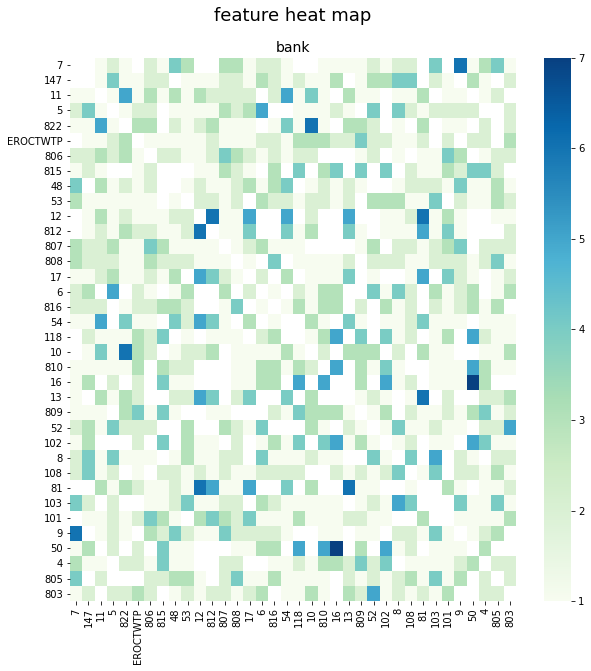

In [79]:
# 畫熱力圖
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(co_matrix_df2,mask=co_matrix_df < 1,cmap='GnBu')
plt.title('bank', size = 14)
plt.suptitle('feature heat map',x = 0.435,y=0.95, fontsize=18)

## co-occurrence graph

In [80]:
from matplotlib import pyplot as plt
import networkx as nx

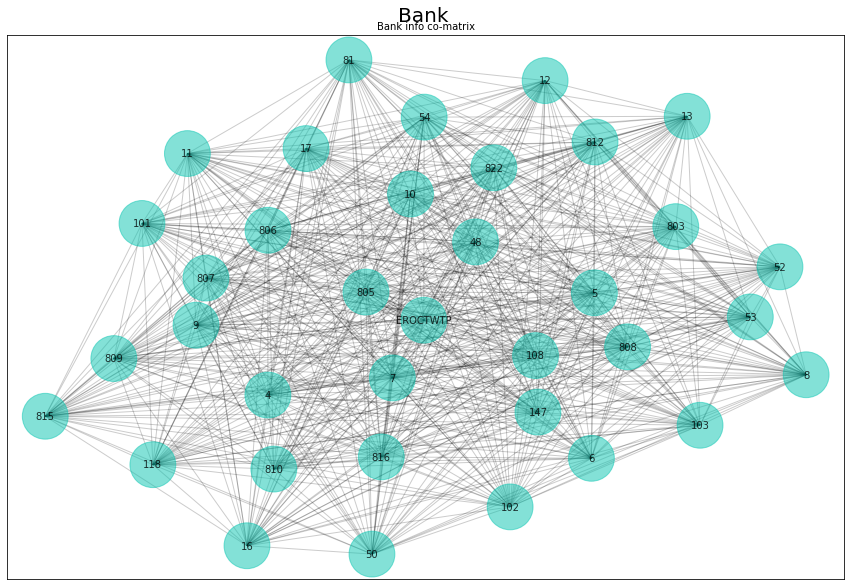

In [81]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()

g.add_weighted_edges_from(co_matrix_weight)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.5,node_size=[val*60 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, alpha=0.2)

nx.draw_networkx_labels(g, pos, font_size = 10, font_family='sans-serif', alpha=0.8)
plt.title('Bank info co-matrix', size = 10)
plt.suptitle('Bank',x = 0.51,y=0.92, fontsize=20)
plt.show()

In [82]:
#顯示權重4以上的銀行
co_matrix_weight_n = []
for each in co_matrix_weight:
    if each[2] > 4:
        co_matrix_weight_n.append(each)

In [83]:
edges = g.edges()
weights = [g[u][v]['weight'] for u,v in edges]

n_weights = []
for i in weights:
    n_weights.append((i-min(weights))/(max(weights)-min(weights)))

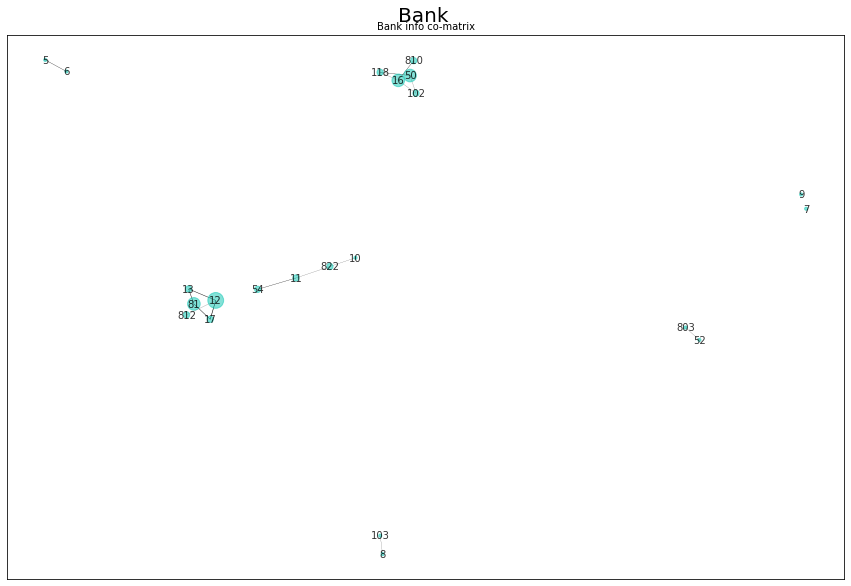

In [84]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_matrix_weight_n)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.5,node_size=[val**2*10 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, width=n_weights, alpha=1)

nx.draw_networkx_labels(g, pos, font_size = 10, font_family='sans-serif', alpha=0.8)
plt.title('Bank info co-matrix', size = 10)
plt.suptitle('Bank',x = 0.51,y=0.92, fontsize=20)

plt.show()

## 小結

由以上網路圖顯示： 

005-006（土銀-合庫）

052-803（渣打銀行-聯邦銀）

007-009（三信銀-彰銀）

008-103（華銀-新光銀）

054-011-822-010（京城銀-上海商銀-中信銀-花旗台灣）

013-017-081-012-812（國泰世華-兆豐商銀-匯豐台灣-台新銀）

102-016-050-118-810（華泰銀-高雄銀-臺企銀-板信銀-星展台灣）

103-008（新光銀行-華銀）

彼此間在各項財務表現上有關聯性

## Apriori及關聯規則

In [85]:
df = pd.read_csv('bank_itemsets.csv',na_values=['#VALUE!', '#DIV/0!'])
df = df.drop(['itemset'], axis=1)

df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,三信銀行,土銀,合庫,板信銀,高雄銀,華銀,陽信銀,新光銀行,臺企銀
1,一銀,台中銀,玉山銀,國泰世華,渣打銀行,華泰銀行,臺銀,遠東銀,聯邦銀
2,元大銀,日盛銀行,台北富邦銀,台新銀,永豐銀行,兆豐商銀,匯豐台灣,瑞興銀,彰銀
3,上海商銀,中信銀,中輸銀,王道銀行,安泰銀,京城銀,花旗台灣,星展台灣,凱基銀行
4,日盛銀行,板信銀,星展台灣,高雄銀,凱基銀行,華泰銀行,瑞興銀,臺企銀,臺銀
5,三信銀行,土銀,中輸銀,永豐銀行,合庫,渣打銀行,華銀,陽信銀,聯邦銀
6,一銀,元大銀,王道銀行,台中銀,玉山銀,安泰銀,新光銀行,彰銀,遠東銀
7,上海商銀,中信銀,台北富邦銀,台新銀,兆豐商銀,京城銀,花旗台灣,國泰世華,匯豐台灣
8,中信銀,中輸銀,花旗台灣,國泰世華,凱基銀行,渣打銀行,匯豐台灣,臺銀,聯邦銀
9,上海商銀,元大銀,日盛銀行,永豐銀行,玉山銀,安泰銀,板信銀,瑞興銀,遠東銀


In [86]:
# 轉成list of list
apr_list = df.values.tolist()
apr_list

[['三信銀行', '土銀', '合庫', '板信銀', '高雄銀', '華銀', '陽信銀', '新光銀行', '臺企銀'],
 ['一銀', '台中銀', '玉山銀', '國泰世華', '渣打銀行', '華泰銀行', '臺銀', '遠東銀', '聯邦銀'],
 ['元大銀', '日盛銀行', '台北富邦銀', '台新銀', '永豐銀行', '兆豐商銀', '匯豐台灣', '瑞興銀', '彰銀'],
 ['上海商銀', '中信銀', '中輸銀', '王道銀行', '安泰銀', '京城銀', '花旗台灣', '星展台灣', '凱基銀行'],
 ['日盛銀行', '板信銀', '星展台灣', '高雄銀', '凱基銀行', '華泰銀行', '瑞興銀', '臺企銀', '臺銀'],
 ['三信銀行', '土銀', '中輸銀', '永豐銀行', '合庫', '渣打銀行', '華銀', '陽信銀', '聯邦銀'],
 ['一銀', '元大銀', '王道銀行', '台中銀', '玉山銀', '安泰銀', '新光銀行', '彰銀', '遠東銀'],
 ['上海商銀', '中信銀', '台北富邦銀', '台新銀', '兆豐商銀', '京城銀', '花旗台灣', '國泰世華', '匯豐台灣'],
 ['中信銀', '中輸銀', '花旗台灣', '國泰世華', '凱基銀行', '渣打銀行', '匯豐台灣', '臺銀', '聯邦銀'],
 ['上海商銀', '元大銀', '日盛銀行', '永豐銀行', '玉山銀', '安泰銀', '板信銀', '瑞興銀', '遠東銀'],
 ['三信銀行', '台中銀', '台北富邦銀', '台新銀', '京城銀', '華泰銀行', '華銀', '陽信銀', '新光銀行'],
 ['一銀', '土銀', '王道銀行', '兆豐商銀', '合庫', '星展台灣', '高雄銀', '彰銀', '臺企銀'],
 ['土銀', '中輸銀', '台北富邦銀', '台新銀', '玉山銀', '兆豐商銀', '國泰世華', '匯豐台灣', '瑞興銀'],
 ['一銀', '上海商銀', '中信銀', '元大銀', '王道銀行', '永豐銀行', '京城銀', '彰銀', '臺銀'],
 ['台中銀', '合庫', '花旗台灣', '星展台灣', '渣打銀行', '華銀

In [87]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(apr_list).transform(apr_list)

te_ary

array([[False,  True, False, ..., False,  True,  True],
       [ True, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ...,  True,  True, False],
       [False, False,  True, ..., False, False, False]])

In [88]:
te.columns_

['一銀',
 '三信銀行',
 '上海商銀',
 '中信銀',
 '中輸銀',
 '京城銀',
 '元大銀',
 '兆豐商銀',
 '凱基銀行',
 '匯豐台灣',
 '台中銀',
 '台北富邦銀',
 '台新銀',
 '合庫',
 '國泰世華',
 '土銀',
 '安泰銀',
 '彰銀',
 '新光銀行',
 '日盛銀行',
 '星展台灣',
 '板信銀',
 '永豐銀行',
 '渣打銀行',
 '玉山銀',
 '王道銀行',
 '瑞興銀',
 '聯邦銀',
 '臺企銀',
 '臺銀',
 '花旗台灣',
 '華泰銀行',
 '華銀',
 '遠東銀',
 '陽信銀',
 '高雄銀']

In [89]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,一銀,三信銀行,上海商銀,中信銀,中輸銀,京城銀,元大銀,兆豐商銀,凱基銀行,匯豐台灣,...,瑞興銀,聯邦銀,臺企銀,臺銀,花旗台灣,華泰銀行,華銀,遠東銀,陽信銀,高雄銀
0,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,True
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,True,True,False,True,...,True,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,True,False,True,True,False,True,False,False,False,True
5,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
6,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,True,True,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
8,False,False,False,True,True,False,False,False,True,True,...,False,True,False,True,True,False,False,False,False,False
9,False,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [90]:
from mlxtend.frequent_patterns import apriori
fre_itemset = apriori(df, min_support=0.2,use_colnames=True) 
fre_itemset

,support,itemsets
0,0.250000,(一銀)
1,0.250000,(三信銀行)
2,0.250000,(上海商銀)
3,0.250000,(中信銀)
4,0.250000,(中輸銀)
5,0.250000,(京城銀)
6,0.250000,(元大銀)
7,0.250000,(兆豐商銀)
8,0.250000,(凱基銀行)
9,0.250000,(匯豐台灣)


In [91]:
# 計算集合中的數量
fre_itemset['length'] = fre_itemset['itemsets'].apply(lambda x: len(x))

In [92]:
# 只顯示集合元素大於2
fre_itemset[fre_itemset['length'] > 1]

,support,itemsets,length
36,0.214286,"(一銀, 彰銀)",2
37,0.214286,"(中信銀, 花旗台灣)",2
38,0.214286,"(匯豐台灣, 台北富邦銀)",2
39,0.214286,"(匯豐台灣, 國泰世華)",2
40,0.214286,"(台北富邦銀, 台新銀)",2
41,0.250000,"(臺企銀, 高雄銀)",2


In [93]:
# 關聯規則表
from mlxtend.frequent_patterns import association_rules
association_rules(fre_itemset)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(一銀),(彰銀),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
1,(彰銀),(一銀),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
2,(中信銀),(花旗台灣),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
3,(花旗台灣),(中信銀),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
4,(匯豐台灣),(台北富邦銀),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
5,(台北富邦銀),(匯豐台灣),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
6,(匯豐台灣),(國泰世華),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
7,(國泰世華),(匯豐台灣),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
8,(台北富邦銀),(台新銀),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25
9,(台新銀),(台北富邦銀),0.25,0.25,0.214286,0.857143,3.428571,0.151786,5.25


## 小結
從上表觀察到：

組(1)一銀,彰銀<br/>
組(2)中信銀,花旗台灣<br/>
組(3)匯豐台灣,台北富邦銀,國泰世華,台新銀<br/>
組(4)臺企銀,高雄銀<br/>

在過去十三年的各項指標綜合表現互有關聯

組(1),(2),(3),(4)的支持度皆是0.25，推測這些現象可能是偶然發生。<br/>
組(1),(2),(3)的信賴度約有0.85，組(4)的信賴度有1，代表各組內銀行同時出現的機率極高<br/>
組(1),(2),(3),(4)的支持度皆>1，表示各組內的銀行有很強的關聯性。
